<h1>Bag-Of-Words</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

<h3>Importing and cleaning the data</h3>

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',  delimiter = '\t', quoting = 3)
nltk.download('stopwords')
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split() 
    ps = PorterStemmer()
    stop_words_list = stopwords.words('english')
    stop_words_list.remove('not')
    review = [ps.stem(word) for word in review if not word in set(stop_words_list)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Creating the bag of words model</h3>

In [3]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
Y = df.iloc[:,-1].values
#len(X[0]) -> max_features

<h3>Splitting the data into Training set and Test set</h3>

In [4]:
df_results_train , df_results_test , df_infos_train , df_infos_test = train_test_split(Y, X , test_size= 0.2, random_state = 0 )

<h3>Training the Naive Bayes model on training set</h3>

In [5]:
classifier = GaussianNB()
classifier.fit(df_infos_train,df_results_train)
pred_train = classifier.predict(df_infos_train)
np.set_printoptions(precision=2)
print(np.concatenate((pred_train.reshape(len(pred_train), 1) ,df_results_train.reshape(len(df_results_train), 1)), axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [6]:
cm = confusion_matrix(pred_train,df_results_train)
print(cm)
score = accuracy_score(pred_train,df_results_train)
print(score)

[[340   0]
 [ 63 397]]
0.92125


<h3>Predicting in Test set using Naive Bayes model</h3>

In [7]:
pred_test = classifier.predict(df_infos_test)
np.set_printoptions(precision=2)
print(np.concatenate((pred_test.reshape(len(pred_test), 1) ,df_results_test.reshape(len(df_results_test), 1)), axis=1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [8]:
cm = confusion_matrix(pred_test,df_results_test)
print(cm)
score = accuracy_score(pred_test,df_results_test)
print(score)

[[55 12]
 [42 91]]
0.73


<h3>Training the Random Forest Classification on training set</h3>

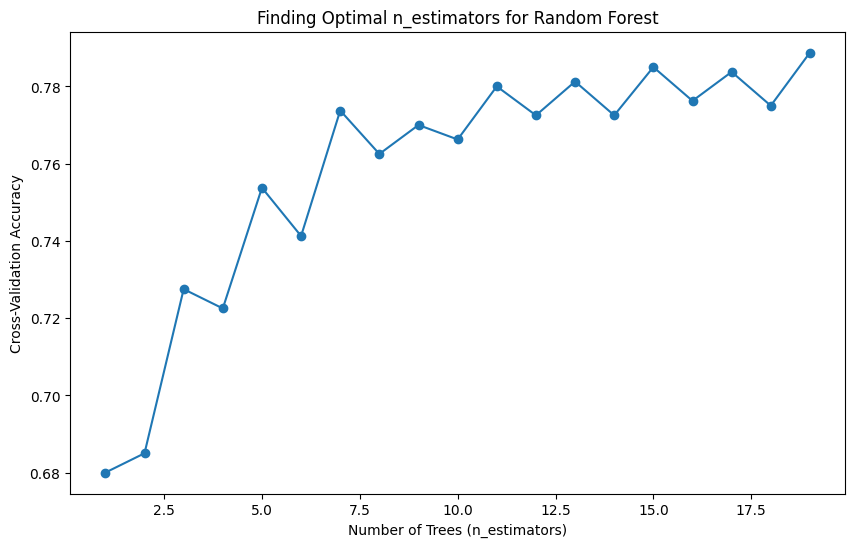

The optimal number of trees is 19


In [9]:
n_estimators_range = range(1, 20, 1)
cv_scores = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(model, df_infos_train, df_results_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding Optimal n_estimators for Random Forest')
plt.show()

optimal_n_estimators = n_estimators_range[np.argmax(cv_scores)]
print(f'The optimal number of trees is {optimal_n_estimators}')

In [10]:
classifier = RandomForestClassifier(n_estimators = optimal_n_estimators)
classifier.fit(df_infos_train,df_results_train)
pred_train = classifier.predict(df_infos_train)
np.set_printoptions(precision=2)
print(np.concatenate((pred_train.reshape(len(pred_train), 1) ,df_results_train.reshape(len(df_results_train), 1)), axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [11]:
cm = confusion_matrix(pred_train,df_results_train)
print(cm)
score = accuracy_score(pred_train,df_results_train)
print(score)

[[402   6]
 [  1 391]]
0.99125


<h3>Predicting in Test set using Random Forest Classification</h3>

In [12]:
pred_test = classifier.predict(df_infos_test)
np.set_printoptions(precision=2)
print(np.concatenate((pred_test.reshape(len(pred_test), 1) ,df_results_test.reshape(len(df_results_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

In [13]:
cm = confusion_matrix(pred_test,df_results_test)
print(cm)
score = accuracy_score(pred_test,df_results_test)
print(score)

[[88 40]
 [ 9 63]]
0.755
